# Setup

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ls

Hierarchical Clustering (1).ipynb  Universities (1).csv
Hierarchical.py                    kmeans.py


In [3]:
Univ = pd.read_csv("Universities (1).csv")

In [4]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


# Hierarchical 

In [5]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [11]:
df_norm.iloc[:,1:]

,Top10,Accept,SFRatio,Expenses,GradRate
0,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.652778,0.394737,0.052632,0.910991,0.666667


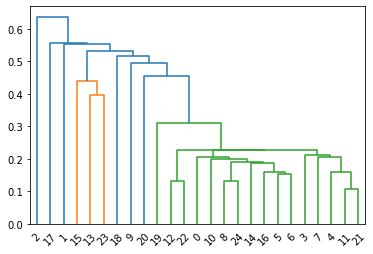

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [12]:
??AgglomerativeClustering

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [14]:
hc.fit_predict(df_norm)

array([0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0])

In [10]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [12]:
df_norm['h_clusterid'] = y_hc 

In [13]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,3
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,1
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,0
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,0
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,0
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,0
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,0


# k means

In [15]:
from sklearn.cluster import KMeans

In [18]:
model_kmeans = KMeans(n_clusters=4) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=4)

In [19]:
model_kmeans.labels_

array([1, 3, 0, 1, 0, 1, 1, 0, 1, 3, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0,
       0, 2, 1], dtype=int32)

In [55]:
model_kmeans.inertia_

2.316066848130834

In [56]:
md=pd.Series(model_kmeans.labels_)

In [57]:
#Complete-linkage clustering - Wikipedia

In [58]:
Univ["labels"]=pd.Series(model_kmeans.labels_)

In [59]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,1


In [63]:
Univ["new_col"]=Univ.index

In [64]:
Univ.groupby(["labels"])["new_col"].apply(lambda x:tuple(x))

labels
0                            (2, 18, 20)
1           (1, 5, 8, 9, 10, 14, 16, 24)
2    (0, 3, 4, 6, 7, 11, 12, 19, 21, 22)
3                       (13, 15, 17, 23)
Name: new_col, dtype: object

# DBSCAN

In [38]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler




In [39]:
from sklearn.datasets import make_moons
x,y=make_moons(100)
data=pd.DataFrame(x)
data.columns=["f1","f2"]
data["class"]=y
data.head()

,f1,f2,class
0,0.777479,-0.474928,1
1,0.159600,0.987182,0
2,1.981559,0.308841,1
3,0.161912,-0.045535,1
4,0.840400,-0.487182,1


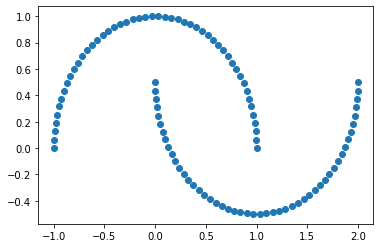

In [40]:
plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)

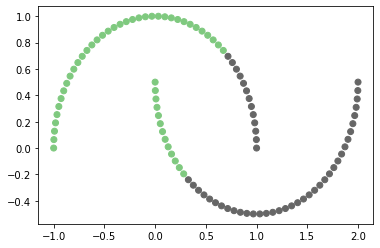

In [45]:
#using kmeans
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
model.fit(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=model.labels_,cmap=plt.cm.Accent)

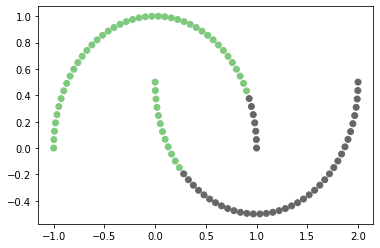

In [11]:
#using hierarchical

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
plt.scatter(data["f1"],data["f2"],c=cluster.fit_predict(data.iloc[:,:2]),cmap=plt.cm.Accent)


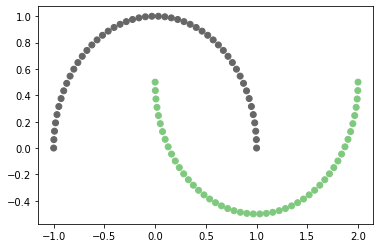

In [15]:
#DBSCAN

dbs=DBSCAN(min_samples=2,eps=0.2)
claas_pr=dbs.fit_predict(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=claas_pr,cmap=plt.cm.Accent)



 # finding the optimal number of clusters


In [23]:
iris=sns.load_dataset("iris") 

In [24]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
133,6.3,2.8,5.1,1.5,virginica
60,5.0,2.0,3.5,1.0,versicolor
55,5.7,2.8,4.5,1.3,versicolor
27,5.2,3.5,1.5,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
127,6.1,3.0,4.9,1.8,virginica
75,6.6,3.0,4.4,1.4,versicolor
24,4.8,3.4,1.9,0.2,setosa
53,5.5,2.3,4.0,1.3,versicolor
84,5.4,3.0,4.5,1.5,versicolor


In [14]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(iris.iloc[:,:4])
    iner.append(km.inertia_)

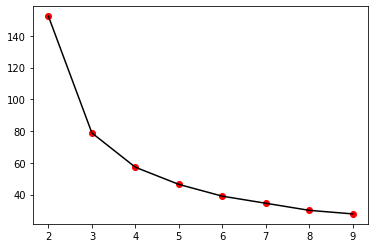

In [15]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# silhouette_score 

In [16]:
from sklearn.metrics import silhouette_score as sil

In [17]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(iris.iloc[:,:4])
    iner.append(sil(iris.iloc[:,:4],y))

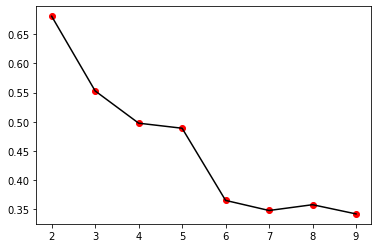

In [18]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# calinski_harabaz_score

In [18]:
from sklearn.metrics import calinski_harabasz_score

In [20]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(iris.iloc[:,:4])
    iner.append(chs(iris.iloc[:,:4],y))

/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/depre

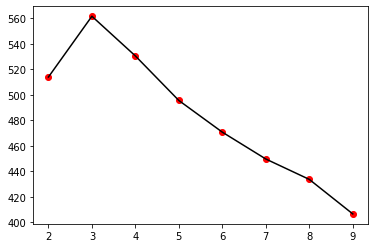

In [21]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()